In [1]:
#SET UP om datafiles te lezen
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import stats


from IPython.core.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


print('de folder met datasets = '  + 'data/')


de folder met datasets = data/


C:\Users\elias\AppData\Local\Temp\ipykernel_19584\1863312042.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


### Correlatie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rng=np.random.RandomState(42) #initialiseren van de randomgenerator
x=10*rng.rand(300)#  geeft een randomgetal tussen 0 en 10
y=(x-4.96)*(x-4.96)
z= 2*x+1+rng.randn(300)
xgem=x.mean()
ygem=y.mean()#correlatie in numpy enkel pearson
print(np.corrcoef(x,y))# geeft correlatiematrix voor pearson

[[ 1.         -0.00479391]
 [-0.00479391  1.        ]]


In [3]:
# correlaties berekenen in pandas dataframe of pandas series
df=pd.DataFrame({'x':x.tolist(),'y':y.tolist(),'z':z.tolist()})
print(df.corr(method='pearson'))                 # geeft matrix van mogelijke correlaties voor de hele dataframe
print(df['x'].corr(df['y'],method='pearson'))    # vergelijkt pandas Series df['x'] en df['y']

          x         y         z
x  1.000000 -0.004794  0.986576
y -0.004794  1.000000 -0.009601
z  0.986576 -0.009601  1.000000
-0.004793905502208458


In [4]:
#correlatie in in pandas, met method kan men de methode vastlegggen
df=pd.DataFrame({'roeien':[1,2,3,4],'loopband':[3,2,4,1]})
print(df.roeien.corr(df.loopband,method='spearman'))

-0.39999999999999997


In [5]:
#correlatie in in pandas, met method kan men de methode vastlegggen
df=pd.DataFrame({'roeien':[1,2,3,4],'loopband':[3,2,4,1]})
print(df.roeien.corr(df.loopband,method='kendall'))

-0.3333333333333334


### Lineaire regressie in SciKit Learn




Voordelen SciKit Learn:

- scikit learn heeft regressie +..
- clustering, classificatie, preprocessing,dimensie reductie en helpt bij model selectie
- gebruik van andere modellen is analoog aan het regressiemodel 
- het pakket is ook voor big data redelijk snel
(https://www.freecodecamp.org/news/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b/)




#### Eenvoudigste regressie model

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0], [1], [2]], [1, 2,3]) 
print(reg.coef_) #richtingscoefficient van de rechte
print(reg.intercept_)#y-waarde van snypunt op y-as
print(reg.score([[0.7], [1], [1.5]], [0.5, 1,3])) #

LinearRegression()

[1.]
1.0000000000000002
0.23142857142857132


#### Voorspellingen maken 1 onafhankelijke (x) en 1 afhankelijke variabele (y)

In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X_train=[[0], [1], [2]]
y_train=[1, 2,3]
X_test= [[0.5],[3]]
y_test=[0.7,4.5]
reg.fit(X_train, y_train) 
y_pred_test=reg.predict(X_test)
print("coeff",reg.coef_) 
print("intercept",reg.intercept_)
print("score",reg.score(X_test,y_test))
print("voorspellingen",y_pred_test)


LinearRegression()

coeff [1.]
intercept 1.0000000000000002
score 0.876731301939058
voorspellingen [1.5 4. ]


In [8]:
#wat doet np.newaxis met een array?
a=np.array([[1,2,3,4,5,6],[11,12,13,14,15,16]])
b=a[:,np.newaxis]
print(a)
print(b)

[[ 1  2  3  4  5  6]
 [11 12 13 14 15 16]]
[[[ 1  2  3  4  5  6]]

 [[11 12 13 14 15 16]]]


In [9]:
# zoeken verband tussen x en z , z is de 'afhankelijke'
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
#print(x)
X=x[:,np.newaxis]# plaats haakjes rond iedere xi is nodig bij numpy array 
#print(X)
X_train=X[:-50]
z_train=z[:-50]
X_test=X[-50:]
z_test=z[-50:]
reg2 = linear_model.LinearRegression()
reg2.fit(X_train,z_train) # np.newaxis zet de waarden van x tussen extra haakjes 
print("coef",reg2.coef_) #richtingscoefficient van de rechte
print("intercept",reg2.intercept_)#y-waarde van snypunt op y-as
z_pred=reg2.predict(X_test)
print("mse",mean_squared_error(z_pred,z_test))


LinearRegression()

coef [2.03070823]
intercept 0.8813870166323827
mse 0.9650527770421731


#### Voorspellingen maken 2 onafhankelijke (x,y) en 1 afhankelijke variabele (z)

In [10]:
# zoeken verband tussne x en z , z is de 'afhankelijke'
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
X=df.iloc[:,0:2]# x,y onafhankelijke
print(X)
X_train=X[:-50]
z_train=y[:-50]
X_test=X[-50:]
z_test=y[-50:]
reg = linear_model.LinearRegression()
reg.fit(X_train,z_train) 
print("coef",reg.coef_) #richtingscoefficient van de rechte
print("intercept",reg.intercept_)#y-waarde van snypunt op y-as
z_pred=reg.predict(X_test)
print("mse",mean_squared_error(z_pred,z_test))


   roeien  loopband
0       1         3
1       2         2
2       3         4
3       4         1


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by LinearRegression.

#### Introductie van train_test_split module en meervoudige regressie

#### Voorbeeld van polynoom regressie (vierde graadsfunctie functie)
bron:https://moonbooks.org/Articles/How-to-implement-a-polynomial-linear-regression-using-scikit-learn-and-python-3-/

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random
rng=np.random.RandomState(42) #initialiseren van de randomgenerator
x=10*rng.rand(300)#  geeft een randomgetal tussen 0 en 10
y=(x-4.96)*(x-4.96)
z= 2*x+1+rng.randn(300)

[0 1 2 3 4 5 6 7 8 9]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


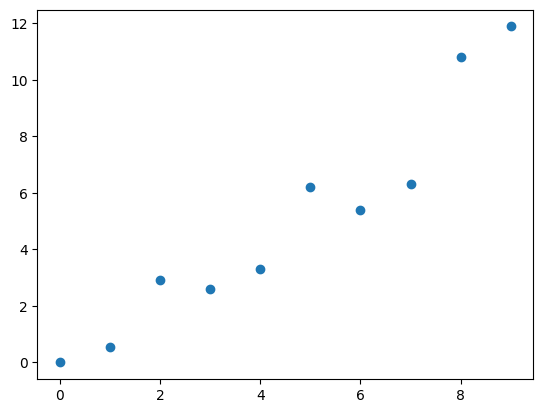

In [15]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

# Stap 1: training data

X = [i for i in range(10)]
Y = [x+random.random()*x-x/2 for x in X]

X = np.asarray(X)
Y = np.asarray(Y)

print(X)
X = X[:,np.newaxis]
Y = Y[:,np.newaxis]
print(X)
plt.scatter(X,Y)


In [16]:
# Stap 2: data preparatie

nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF = polynomial_features.fit_transform(X)

print(X_TRANSF)# we zien via print dat x0=1 x1=x x2=x^2 x3=x^3...
#----------------------------------------------------------------------------------------#

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]]


In [17]:
# Stap 3: definitie en training

model = LinearRegression()

model.fit(X_TRANSF, Y)

#----------------------------------------------------------------------------------------#
# Stap 4: berekening R2 en se

Y_NEW = model.predict(X_TRANSF)

se = np.sqrt(mean_squared_error(Y,Y_NEW))
r2 = r2_score(Y,Y_NEW)

print('RMSE of se: ', se) #se wordt soms afgekort
print('R2: ', r2)


LinearRegression()

RMSE of se:  0.828741359618092
R2:  0.9516856160502307


(0.0, 10.0)

(0.0, 10.0)

NameError: name 'rmse' is not defined

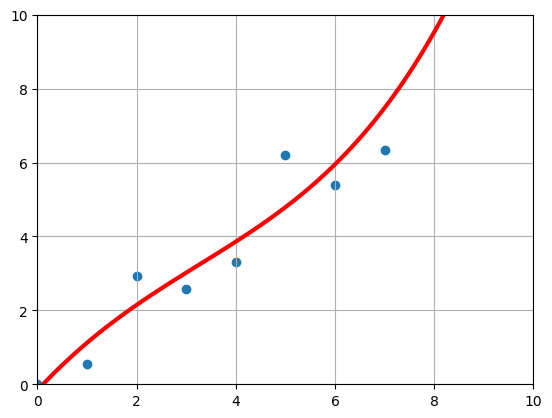

In [18]:
# Step 5: predictie

x_new_min = 0.0
x_new_max = 10.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)

Y_NEW = model.predict(X_NEW_TRANSF)

plt.plot(X_NEW, Y_NEW, color='red', linewidth=3)
plt.scatter(X,Y)
plt.grid()
plt.xlim(x_new_min,x_new_max)
plt.ylim(0,10)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression \n " + title,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()

In [19]:
# werkwijze voor exponentiele regressie met 1 variabele 
from sklearn import linear_model
reg = linear_model.LinearRegression()
X_train=[ [1], [2],[3],[4],[5],[6]]
y_train=[ 2, 4,8,16,32,63]
X_test= [[4.5],[7]]
y_test=[50,110]
#transformeren de gegevens door log te nemen van de y-waarden
reg.fit(X_train, np.log(y_train)) 
y_pred_test=reg.predict(X_test)
print("coeff",reg.coef_) 
print("intercept",reg.intercept_)
print("score",reg.score(X_test,y_test))
print("voorspellingen",np.exp(y_pred_test))
#we moeten de voorspellingen terug zetten door exponentiele te nemen

LinearRegression()

coeff [0.69089742]
intercept 0.005249452322713566
score -6.364763074104056
voorspellingen [ 22.51738823 126.66317011]
